Saving salary_lpa - Sheet1.csv to salary_lpa - Sheet1 (2).csv
Dataset Loaded Successfully
   Experience_years  Salary_lpa
0               0.5         3.0
1               1.0         3.5
2               2.0         4.5
3               3.0         5.2
4               4.0         6.0
Columns: Index(['Experience_years', 'Salary_lpa'], dtype='object')
Regression Equation:
Salary = 0.76 * Experience + 2.89
Predicted Salary for 5 Years Experience: 6.7 LPA
MAE: 0.13
R2 Score: 1.0


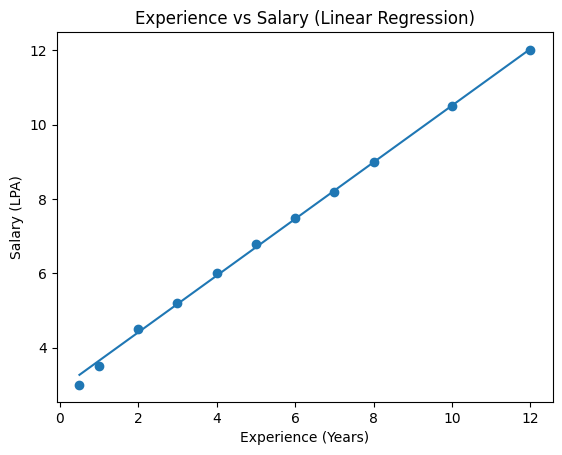

In [4]:
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv(file_name)

print("Dataset Loaded Successfully")
print(df.head())
print("Columns:", df.columns)

X = df[['Experience_years']]
y = df['Salary_lpa']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

slope = model.coef_[0]
intercept = model.intercept_

print("Regression Equation:")
print(f"Salary = {round(slope,2)} * Experience + {round(intercept,2)}")

y_pred = model.predict(X_test)

new_data = pd.DataFrame({'Experience_years': [5]})
predicted_salary = model.predict(new_data)[0]

print("Predicted Salary for 5 Years Experience:",
      round(predicted_salary, 2), "LPA")

print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))
print("R2 Score:", round(r2_score(y_test, y_pred), 2))

plt.scatter(X, y)
plt.plot(X, model.predict(X))
plt.xlabel("Experience (Years)")
plt.ylabel("Salary (LPA)")
plt.title("Experience vs Salary (Linear Regression)")
plt.show()